In [ ]:
import pandas as pd
import numpy as np
from scipy.io import arff
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data, meta = arff.loadarff('/content/china (1).arff')
df = pd.DataFrame(data)
df.to_csv('/content/china.csv', index = False)

In [ ]:
# df = pd.DataFrame(data)
# df.to_csv('china_dataset.csv', index=False)

df = pd.read_csv('/content/china.csv')
print(df.head())


    ID     AFP  Input  Output  Enquiry   File  Interface   Added  Changed  \
0  1.0  1587.0  774.0   260.0    340.0  128.0        0.0  1502.0      0.0   
1  2.0   260.0    9.0     4.0      3.0  193.0       41.0    51.0    138.0   
2  3.0   152.0   25.0    33.0     28.0   42.0       35.0   163.0      0.0   
3  4.0   252.0  151.0    28.0      8.0   39.0        0.0    69.0    153.0   
4  5.0   292.0   93.0     0.0    194.0   20.0        0.0     0.0    307.0   

   Deleted  PDR_AFP  PDR_UFP  NPDR_AFP  NPDU_UFP  Resource  Dev.Type  \
0      0.0      4.7      5.0       4.7       5.0       4.0       0.0   
1     61.0     16.0     16.6      16.0      16.6       2.0       0.0   
2      0.0      4.4      4.1       4.4       4.1       1.0       0.0   
3      4.0     12.8     14.3      15.5      17.3       1.0       0.0   
4      0.0     10.3      9.8      12.4      11.7       1.0       0.0   

   Duration  N_effort  Effort  
0       4.0    7490.0  7490.0  
1      17.0    4150.0  4150.0  
2       

# 1 Conversion to Numerical Data

All columns appear to be numeric (float64) already, so no additional conversion is needed.

In [ ]:
print("\n Conversion to Numerical Data")
print("\n Data types of columns:")
print(df.dtypes)
print(df.head())


 Conversion to Numerical Data

 Data types of columns:
ID           float64
AFP          float64
Input        float64
Output       float64
Enquiry      float64
File         float64
Interface    float64
Added        float64
Changed      float64
Deleted      float64
PDR_AFP      float64
PDR_UFP      float64
NPDR_AFP     float64
NPDU_UFP     float64
Resource     float64
Dev.Type     float64
Duration     float64
N_effort     float64
Effort       float64
dtype: object

The data is already in numeric format:
    ID     AFP  Input  Output  Enquiry   File  Interface   Added  Changed  \
0  1.0  1587.0  774.0   260.0    340.0  128.0        0.0  1502.0      0.0   
1  2.0   260.0    9.0     4.0      3.0  193.0       41.0    51.0    138.0   
2  3.0   152.0   25.0    33.0     28.0   42.0       35.0   163.0      0.0   
3  4.0   252.0  151.0    28.0      8.0   39.0        0.0    69.0    153.0   
4  5.0   292.0   93.0     0.0    194.0   20.0        0.0     0.0    307.0   

   Deleted  PDR_AFP  PDR_UFP

# 2 Sequential Conversion and Time Indexing


In [ ]:
# print(df['Duration'].value_counts().sort_index())

# print("\n=== Sequential conversion and time indexing ===")
# df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
# df = df.rename(columns={'Duration': 'DurationMonths'})
# df = df.sort_values('DurationMonths')
# df = df.set_index('DurationMonths')

# print("The first 5 rows of the newly created 'DurationMonths' index:")
# print(df.index[:5])

# 3 Missing Data Processing

Check and handle NaN values to ensure data completeness. Fill missing values in numeric columns with the mean.

In [ ]:
print("\nMissing Data Processing")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values")
else:
    print("Have missing values")
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


Missing Data Processing
No missing values


### Handling Negative Values

The China dataset doesn’t explicitly show negative values in the sample, but we’ll add a check for safety.

In [ ]:
# print("\nHandling negative values:")
# if (df < 0).any().any():
#     df[df < 0] = 0
#     print("Replaced negative values with 0.")
# else:
#     print("No negative values found in the dataset.")

# 4 Handling Outliers (Value Capping)

Mitigate the impact of outliers by capping them within an acceptable range based on the IQR.

In [ ]:
print("\nHandling Outliers (Value Capping)")
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    cap_outliers(df, col)

print("Outliers capped using IQR method.")


Handling Outliers (Value Capping)
Outliers capped using IQR method.


# 6. Data Splitting

Split the dataset into training and testing sets using an 80/20 ratio, with 'Effort' as the target variable.

In [ ]:
print("\nData Splitting (Partitioning)")
X = df.drop(columns=['Effort','ID'])  # Drop 'ID' as it’s not a feature
y = df['Effort']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Total number of samples: {len(df)}")
print(f"- Training samples (X_train): {len(X_train)}")
print(f"- Testing samples (X_test): {len(X_test)}")


Data Splitting (Partitioning)
Total number of samples: 499
- Training samples (X_train): 399
- Testing samples (X_test): 100


# 7. Data Standardization

Standardize features using StandardScaler for zero mean and unit variance.

In [ ]:
# print("\nData Standardization (StandardScaler)")
# scaler_X = StandardScaler()
# scaler_y = StandardScaler()

# X_train_scaled = scaler_X.fit_transform(X_train)
# X_test_scaled = scaler_X.transform(X_test)

# y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
# y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# print("\nStatistics before standardization (X_train):")
# print(X_train.describe().T[['mean', 'std']])

# print("\nStatistics after standardization (X_train_scaled):")
# print(X_train_scaled_df.describe().T[['mean', 'std']])


# 8. Inverse Transformation

Apply inverse transformation to return standardized data to its original scale.

In [ ]:
# print("\nInverse Transformation")

# X_train_original = scaler_X.inverse_transform(X_train_scaled)
# y_train_original = scaler_y.inverse_transform(y_train_scaled)

# X_train_original_df = pd.DataFrame(X_train_original, columns=X_train.columns, index=X_train.index)

# print("\n=== X_train data after inverse transformation (original scale) ===")
# print(pd.DataFrame(X_train_original, columns=X_train.columns).head())

# print("\n=== y_train target after inverse transformation ===")
# print(y_train_original[:5].flatten())


In [ ]:
df.to_csv("china_processed.csv", index=True)

In [ ]:
!pip install mealpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 94.7 MB/s eta 0:00:00


# 8. LSTM


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from mealpy import FloatVar, IntegerVar, WOA
import matplotlib.pyplot as plt

In [ ]:
# df = pd.read_csv("/content/china_processed.csv", index_col="DurationMonths")
df = pd.read_csv("/content/china_processed.csv")


# Features and target
X = df.drop(columns=['Effort', 'ID']).values
y = df['Effort'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Reshape for LSTM (samples, timesteps, features)
input_shape = (X_train_scaled.shape[1], 1)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
INFO:mealpy.swarm_based.WOA.OriginalWOA:Solving single objective optimization problem.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layer

Optimized Hyperparameters: Learning Rate = 0.017978, Epochs = 68, Batch Size = 71
Epoch 1/68


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - loss: 1.5538 - val_loss: 0.2404
Epoch 2/68
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1869 - val_loss: 0.1449
Epoch 3/68
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0968 - val_loss: 0.0710
Epoch 4/68
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0716 - val_loss: 0.0794
Epoch 5/68
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0576 - val_loss: 0.0460
Epoch 6/68
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0371 - val_loss: 0.0189
Epoch 7/68
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0232 - val_loss: 0.0239
Epoch 8/68
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0182 - val_loss: 0.0197
Epoch 9/68
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0218 - val_loss: 0.0190
Epoch 10/68
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0185 - val_loss: 0.0189
Epoch 11/68
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0182 - val_loss: 0.0167
Epoch 12/68
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0152 - val_loss: 0.0211
Epoch 13/68

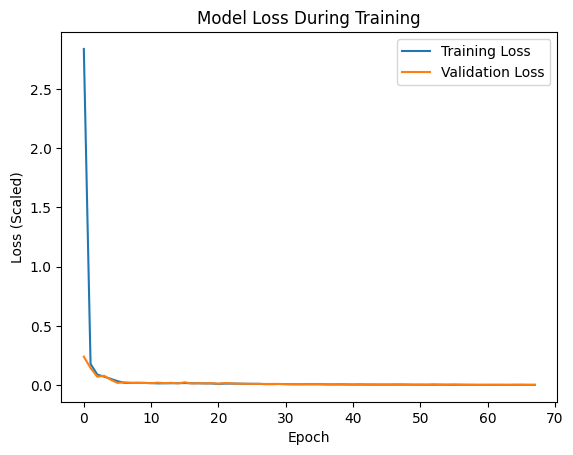

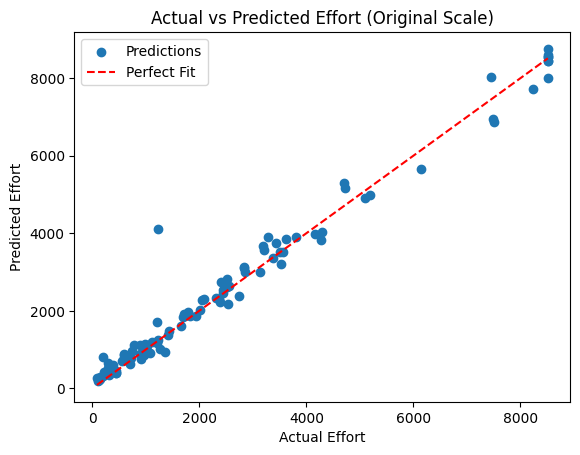

In [ ]:

# Define the LSTM model creation function
def create_lstm_model(learning_rate, epochs, batch_size, input_shape):
    model = Sequential()
    model.add(LSTM(units=64, activation='tanh', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))  # Regression output
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Objective function for optimization
def objective_function(solution, X_train, y_train, input_shape, use_sequences=True):
    learning_rate, epochs, batch_size = solution
    model = create_lstm_model(learning_rate, epochs, batch_size, input_shape)
    model.fit(X_train, y_train, epochs=int(epochs), batch_size=int(batch_size), verbose=0, validation_split=0.2)
    y_pred_scaled = model.predict(X_train, verbose=0).flatten()
    mse = mean_squared_error(y_train, y_pred_scaled)
    return mse

# Define the problem dictionary with bounds
problem_dict = {
    "obj_func": lambda solution: objective_function(solution, X_train_scaled, y_train_scaled, input_shape),
    "bounds": [
        FloatVar(lb=0.0001, ub=1, name="learning_rate"),
        IntegerVar(lb=1, ub=100, name="epochs"),
        IntegerVar(lb=1, ub=100, name="batch_size")
    ],
    "minmax": "min"
}




In [ ]:
# Run WOA
optimizer = WOA.OriginalWOA(epoch=10, pop_size=30)
best_solution = optimizer.solve(problem_dict)

# Extract optimized hyperparameters
best_learning_rate = best_solution.solution[0]
best_epochs = int(best_solution.solution[1])
best_batch_size = int(best_solution.solution[2])

print(f"Optimized Hyperparameters: Learning Rate = {best_learning_rate:.6f}, Epochs = {best_epochs}, Batch Size = {best_batch_size}")


In [ ]:

# Build and train the final LSTM
final_model = create_lstm_model(best_learning_rate, best_epochs, best_batch_size, input_shape)
history = final_model.fit(X_train_scaled, y_train_scaled, epochs=best_epochs, batch_size=best_batch_size,
                          verbose=1, validation_split=0.2)

# Predict on test set (in scaled space)
y_pred_scaled = final_model.predict(X_test_scaled, verbose=0).flatten()

# Reverse transform predictions and test values to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred_scaled)
pred25 = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled) <= 0.25) * 100
mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)

print(f"\nEvaluation Metrics (Original Scale):")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"PRED(25): {pred25:.2f}%")
print(f"MAE_SCALED: {mae_scaled}" )

# Display actual vs predicted values
print("\nActual vs Predicted (Original Scale):")
for actual, pred in zip(y_test_original, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")


In [ ]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (Scaled)')
plt.legend()
plt.show()

# Plot actual vs predicted
plt.scatter(y_test_original, y_pred, label='Predictions')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--', label='Perfect Fit')
plt.xlabel('Actual Effort')
plt.ylabel('Predicted Effort')
plt.title('Actual vs Predicted Effort (Original Scale)')
plt.legend()
plt.show()

# CNN

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.metrics import mean_squared_error, r2_score
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from mealpy import FloatVar, IntegerVar, WOA
# import matplotlib.pyplot as plt


# df = pd.read_csv("/content/china_processed.csv", index_col="DurationMonths")


# # Features and target
# X = df.drop(columns=['Effort', 'ID']).values
# y = df['Effort'].values

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale the data
# scaler_X = MinMaxScaler()
# scaler_y = MinMaxScaler()
# X_train_scaled = scaler_X.fit_transform(X_train)
# X_test_scaled = scaler_X.transform(X_test)
# y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
# y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# # Reshape for 1D CNN (samples, timesteps, features)
# input_shape = (X_train_scaled.shape[1], 1)
# X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
# X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# # Define the CNN model creation function
# def create_cnn_model(learning_rate, epochs, batch_size, input_shape):
#     model = Sequential()
#     model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
#     model.add(MaxPooling1D(pool_size=2))
#     model.add(Flatten())
#     model.add(Dense(64, activation='relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(1))  # Regression output
#     model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
#     return model

# # Define the objective function for WOA
# def objective_function(solution, X_train, y_train, input_shape, use_sequences=True):
#     learning_rate, epochs, batch_size = solution
#     model = create_cnn_model(learning_rate, epochs, batch_size, input_shape)
#     model.fit(X_train, y_train, epochs=int(epochs), batch_size=int(batch_size), verbose=0, validation_split=0.2)
#     y_pred_scaled = model.predict(X_train, verbose=0).flatten()
#     mse = mean_squared_error(y_train, y_pred_scaled)
#     return mse

# # Define the problem dictionary with bounds
# problem_dict = {
#     "obj_func": lambda solution: objective_function(solution, X_train_scaled, y_train_scaled, input_shape, use_sequences=True),
#     "bounds": [
#         FloatVar(lb=0.0001, ub=1, name="learning_rate"),
#         IntegerVar(lb=1, ub=100, name="epochs"),
#         IntegerVar(lb=1, ub=100, name="batch_size")
#     ],
#     "minmax": "min"
# }

# # Run WOA
# optimizer = WOA.OriginalWOA(epoch=10, pop_size=30)
# best_solution = optimizer.solve(problem_dict)

# # Extract optimized hyperparameters
# best_learning_rate = best_solution.solution[0]
# best_epochs = int(best_solution.solution[1])
# best_batch_size = int(best_solution.solution[2])

# print(f"Optimized Hyperparameters: Learning Rate = {best_learning_rate:.6f}, Epochs = {best_epochs}, Batch Size = {best_batch_size}")

# # Build and train the final CNN
# final_model = create_cnn_model(best_learning_rate, best_epochs, best_batch_size, input_shape)
# history = final_model.fit(X_train_scaled, y_train_scaled, epochs=best_epochs, batch_size=best_batch_size,
#                           verbose=1, validation_split=0.2)

# # Predict on test set (in scaled space)
# y_pred_scaled = final_model.predict(X_test_scaled, verbose=0).flatten()

# # Reverse transform predictions and test values to original scale
# y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
# y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# # Calculate evaluation metrics
# mse = mean_squared_error(y_test_scaled, y_pred_scaled)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test_scaled, y_pred_scaled)
# pred25 = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled) <= 0.25) * 100

# print(f"\nEvaluation Metrics (Original Scale):")
# print(f"MSE: {mse:.4f}")
# print(f"RMSE: {rmse:.4f}")
# print(f"R²: {r2:.4f}")
# print(f"PRED(25): {pred25:.2f}%")

# # Display actual vs predicted values
# print("\nActual vs Predicted (Original Scale):")
# for actual, pred in zip(y_test_original, y_pred):
#     print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# # Plot training history
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss During Training')
# plt.xlabel('Epoch')
# plt.ylabel('Loss (Scaled)')
# plt.legend()
# plt.show()

# # Plot actual vs predicted
# plt.scatter(y_test_original, y_pred, label='Predictions')
# plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--', label='Perfect Fit')
# plt.xlabel('Actual Effort')
# plt.ylabel('Predicted Effort')
# plt.title('Actual vs Predicted Effort (Original Scale)')
# plt.legend()
# plt.show()

# MODEL EVALUATION (Original Scale)


Evaluation Metrics (Original Scale):
MSE: 150180.4000
MAE: 227.1415
RMSE: 387.5312
R²: 0.9743
MMRE: 0.2482
MdMRE: 0.0932
PRED(25): 78.00%
MAE_SCALED: 0.02676976187216336


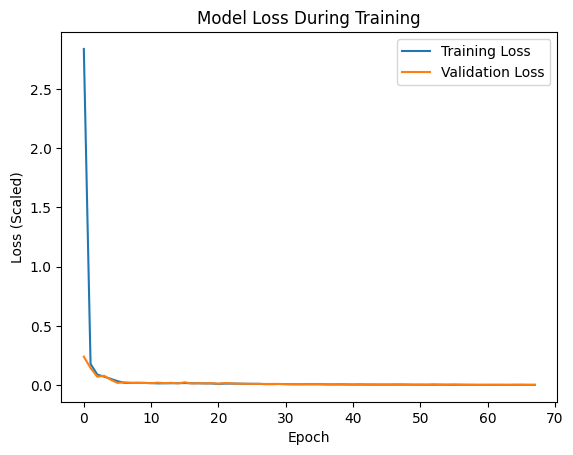

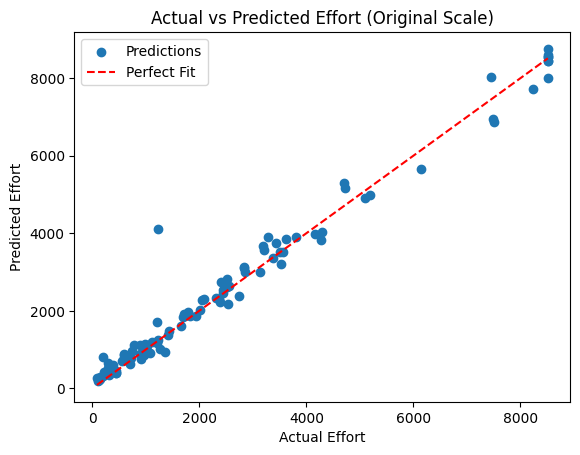

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test_original, y_pred)
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)

# Calculate relative errors for MMRE and MdMRE
relative_errors = np.abs((y_test_original - y_pred) / y_test_original)
mmre = np.mean(relative_errors)
mdmre = np.median(relative_errors)

# Calculate PRED(25)
pred25 = np.mean(relative_errors <= 0.25) * 100

# Print all metrics
print(f"\nEvaluation Metrics (Original Scale):")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MMRE: {mmre:.4f}")
print(f"MdMRE: {mdmre:.4f}")
print(f"PRED(25): {pred25:.2f}%")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (Scaled)')
plt.legend()
plt.show()

# Plot actual vs predicted
plt.scatter(y_test_original, y_pred, label='Predictions')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--', label='Perfect Fit')
plt.xlabel('Actual Effort')
plt.ylabel('Predicted Effort')
plt.title('Actual vs Predicted Effort (Original Scale)')
plt.legend()
plt.show()